# EXPLORATORY DATA ANALYSIS

# Import Essential Python Libraries

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# Setup : Import the Dataset

We will use the data stored in `cleaned-alzheimers-dataset.csv` created at the end of `Data Extraction and Cleaning`

In [2]:
alzheimersdata = pd.read_csv('cleaned-alzheimers-dataset.csv',index_col= 0)
alzheimersdata

,MRI ID,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS1_0001_MR1,F,74,2.0,3.0,29.0,0.0,1344,0.743,1.306
1,OAS1_0002_MR1,F,55,4.0,1.0,29.0,0.0,1147,0.810,1.531
2,OAS1_0003_MR1,F,73,4.0,3.0,27.0,0.5,1454,0.708,1.207
3,OAS1_0010_MR1,M,74,5.0,2.0,30.0,0.0,1636,0.689,1.073
4,OAS1_0011_MR1,F,52,3.0,2.0,30.0,0.0,1321,0.827,1.329
...,...,...,...,...,...,...,...,...,...,...
603,OAS2_0185_MR2,M,82,1.0,1.0,28.0,0.5,1693,0.694,1.037
604,OAS2_0185_MR3,M,86,1.0,1.0,26.0,0.5,1688,0.675,1.040
605,OAS2_0186_MR1,F,61,1.0,2.0,30.0,0.0,1319,0.801,1.331
606,OAS2_0186_MR2,F,63,1.0,2.0,30.0,0.0,1327,0.796,1.323


# Response Variable

Let us start by exploring the response variable `CDR`, the one we are supposed to predict at the end of the day.

### CDR - Clinical Dementia Rating

In [3]:
cdr_mapping = {
    0: 'Normal',
    0.5: 'Very Mild',
    1: 'Mild',
    2: 'Moderate',
    3: 'Severe'
}

# Map the numeric values of CDR to corresponding words
alzheimersdata['CDR'] = alzheimersdata['CDR'].map(cdr_mapping)


# Print the updated DataFrame
print(alzheimersdata.head())

          MRI ID M/F  Age  Educ  SES  MMSE        CDR  eTIV   nWBV    ASF
0  OAS1_0001_MR1   F   74   2.0  3.0  29.0     Normal  1344  0.743  1.306
1  OAS1_0002_MR1   F   55   4.0  1.0  29.0     Normal  1147  0.810  1.531
2  OAS1_0003_MR1   F   73   4.0  3.0  27.0  Very Mild  1454  0.708  1.207
3  OAS1_0010_MR1   M   74   5.0  2.0  30.0     Normal  1636  0.689  1.073
4  OAS1_0011_MR1   F   52   3.0  2.0  30.0     Normal  1321  0.827  1.329


/Users/chloeyeo/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


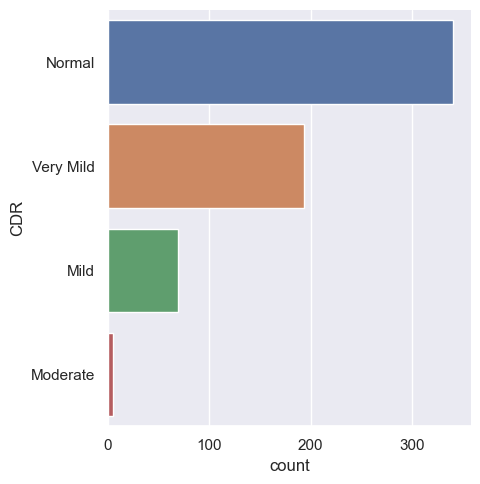

In [4]:
sb.catplot(y = 'CDR', data = alzheimersdata, kind = "count")

In [5]:
countNormal, countVeryMild, countMild, countModerate = alzheimersdata['CDR'].value_counts()
print("Ratio of classes is Normal : Very Mild: Mild: Moderate = ", countNormal, ":", countVeryMild, ":", countMild, ":", countModerate)

Ratio of classes is Normal : Very Mild: Mild: Moderate =  341 : 193 : 69 : 5


Let us explore the other clinical info variable `MMSE`

### MMSE - Mini-Mental State Examination

In [6]:
# Convert 'MMSE' column to numeric type (assuming it contains numeric values)
alzheimersdata['MMSE'] = pd.to_numeric(alzheimersdata['MMSE'], errors='coerce')

# Round 'MMSE' values to remove decimal places
alzheimersdata['MMSE'] = alzheimersdata['MMSE'].round(0)

# Define custom ranges for MMSE categories
ranges = [[0, 9], [10, 18], [19, 23], [24, 30]]
categories = ['Severe Cognitive Impairment', 
              'Moderate Cognitive Impairment', 
              'Mild Cognitive Impairment', 
              'Normal']

# Define a function to map numerical values of MMSE to categories
def map_mmse_category(mmse_value):
    for i, (range_start, range_end) in enumerate(ranges):
        if range_start <= mmse_value <= range_end:
            return categories[i]
    return None

# Apply the mapping function to the 'MMSE' column
alzheimersdata['MMSE'] = alzheimersdata['MMSE'].apply(map_mmse_category)

# Print the updated DataFrame
print(alzheimersdata.head())


          MRI ID M/F  Age  Educ  SES    MMSE        CDR  eTIV   nWBV    ASF
0  OAS1_0001_MR1   F   74   2.0  3.0  Normal     Normal  1344  0.743  1.306
1  OAS1_0002_MR1   F   55   4.0  1.0  Normal     Normal  1147  0.810  1.531
2  OAS1_0003_MR1   F   73   4.0  3.0  Normal  Very Mild  1454  0.708  1.207
3  OAS1_0010_MR1   M   74   5.0  2.0  Normal     Normal  1636  0.689  1.073
4  OAS1_0011_MR1   F   52   3.0  2.0  Normal     Normal  1321  0.827  1.329


In [7]:
alzheimersdata

,MRI ID,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS1_0001_MR1,F,74,2.0,3.0,Normal,Normal,1344,0.743,1.306
1,OAS1_0002_MR1,F,55,4.0,1.0,Normal,Normal,1147,0.810,1.531
2,OAS1_0003_MR1,F,73,4.0,3.0,Normal,Very Mild,1454,0.708,1.207
3,OAS1_0010_MR1,M,74,5.0,2.0,Normal,Normal,1636,0.689,1.073
4,OAS1_0011_MR1,F,52,3.0,2.0,Normal,Normal,1321,0.827,1.329
...,...,...,...,...,...,...,...,...,...,...
603,OAS2_0185_MR2,M,82,1.0,1.0,Normal,Very Mild,1693,0.694,1.037
604,OAS2_0185_MR3,M,86,1.0,1.0,Normal,Very Mild,1688,0.675,1.040
605,OAS2_0186_MR1,F,61,1.0,2.0,Normal,Normal,1319,0.801,1.331
606,OAS2_0186_MR2,F,63,1.0,2.0,Normal,Normal,1327,0.796,1.323


/Users/chloeyeo/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


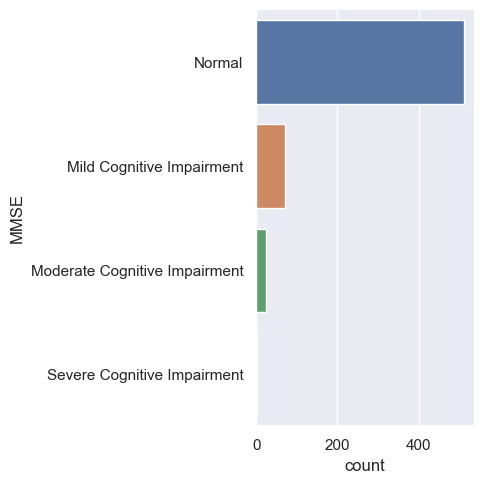

In [8]:
sb.catplot(y = "MMSE", data = alzheimersdata, kind = "count")

In [9]:
countNormal, countMild, countModerate, countSevere = alzheimersdata['MMSE'].value_counts()
print("Ratio of classes is Normal : Mild Cognitive Impairment: Moderate Cognitive Impairment : Severe Cognitive Impairment = ", countNormal, ":", countMild, ":", countModerate, ":", countSevere)

Ratio of classes is Normal : Mild Cognitive Impairment: Moderate Cognitive Impairment : Severe Cognitive Impairment =  511 : 70 : 23 : 2


### Deciding whether MMSE should be a response variable

<Axes: xlabel='MMSE', ylabel='CDR'>

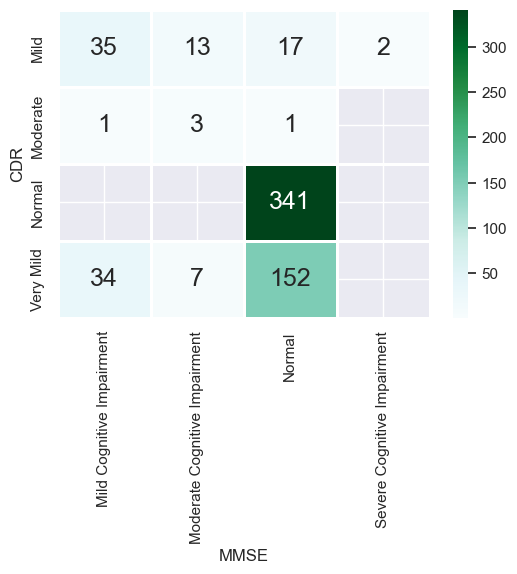

In [10]:
#CDR vs MMSE
f = plt.figure(figsize=(6, 4))
sb.heatmap(alzheimersdata.groupby(['CDR', 'MMSE']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

As there is higher 'normal' (511) in MMSE than 'normal' (341) in CDR, MMSE is not representative of whether there is dementia but it is helpful in predicting. 
#### Hence, 'MMSE' will be used as a predictor variable, not a response variable.

# Predictor Variables

### Numeric Predictors

In [11]:
# Extract only the numeric data variables
numericData = pd.DataFrame(alzheimersdata[["Age", "eTIV", "nWBV", "ASF"]])

# Summary Statistics for all Variables
numericData.describe().round(2)

,Age,eTIV,nWBV,ASF
count,608.00,608.00,608.00,608.00
mean,75.21,1477.06,0.74,1.20
std,9.87,170.65,0.04,0.14
min,33.00,1106.00,0.64,0.88
25%,70.00,1352.50,0.70,1.12
50%,76.00,1460.00,0.74,1.20
75%,82.00,1569.00,0.77,1.30
max,98.00,2004.00,0.85,1.59


### Categorical Predictors

Changing SES to a catgorical variable

In [12]:
ses_mapping = {
    1: 'Highest',
    2: 'High',
    3: 'Medium',
    4: 'Low',
    5: 'Lowest'
}

# Map the numeric values of SES to corresponding words
alzheimersdata['SES'] = alzheimersdata['SES'].map(ses_mapping)


# Print the updated DataFrame
print(alzheimersdata.head())

          MRI ID M/F  Age  Educ      SES    MMSE        CDR  eTIV   nWBV  \
0  OAS1_0001_MR1   F   74   2.0   Medium  Normal     Normal  1344  0.743   
1  OAS1_0002_MR1   F   55   4.0  Highest  Normal     Normal  1147  0.810   
2  OAS1_0003_MR1   F   73   4.0   Medium  Normal  Very Mild  1454  0.708   
3  OAS1_0010_MR1   M   74   5.0     High  Normal     Normal  1636  0.689   
4  OAS1_0011_MR1   F   52   3.0     High  Normal     Normal  1321  0.827   

     ASF  
0  1.306  
1  1.531  
2  1.207  
3  1.073  
4  1.329  


Changing Educ to a categorical variable

In [13]:
Educ_mapping = {
    1: 'Less Than High School Grad',
    2: 'High School Grad',
    3: 'Some college',
    4: 'College Grad',
    5: 'Beyond College'
}

# Round 'MMSE' values to remove decimal places
alzheimersdata['Educ'] = alzheimersdata['Educ'].round(0)

# Map the numeric values of Educ to corresponding words
alzheimersdata['Educ'] = alzheimersdata['Educ'].map(Educ_mapping)


# Print the updated DataFrame
print(alzheimersdata.head())

          MRI ID M/F  Age              Educ      SES    MMSE        CDR  eTIV  \
0  OAS1_0001_MR1   F   74  High School Grad   Medium  Normal     Normal  1344   
1  OAS1_0002_MR1   F   55      College Grad  Highest  Normal     Normal  1147   
2  OAS1_0003_MR1   F   73      College Grad   Medium  Normal  Very Mild  1454   
3  OAS1_0010_MR1   M   74    Beyond College     High  Normal     Normal  1636   
4  OAS1_0011_MR1   F   52      Some college     High  Normal     Normal  1321   

    nWBV    ASF  
0  0.743  1.306  
1  0.810  1.531  
2  0.708  1.207  
3  0.689  1.073  
4  0.827  1.329  


In [14]:
# Extract only the categorical data variables
catData = pd.DataFrame(alzheimersdata[["M/F", "SES", "Educ"]])

# Summary Statistics for all Variables
catData.describe()

,M/F,SES,Educ
count,608,570,608
unique,2,5,5
top,F,High,Less Than High School Grad
freq,369,168,316


## Predictors Corresponding to Demographics Information

### Age

<Axes: xlabel='Age', ylabel='Count'>

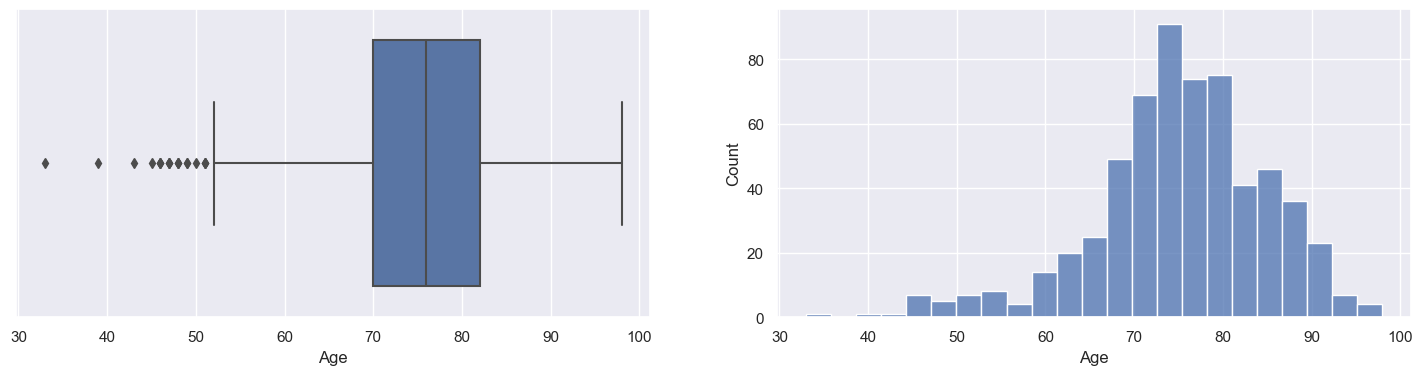

In [15]:
f, axes = plt.subplots(1, 2, figsize=(18, 4))
sb.boxplot(x = numericData['Age'], orient = "h", ax = axes[0])
sb.histplot(x = numericData['Age'], ax = axes[1])

In [16]:
numericData['Age'].describe().round(2)

count    608.00
mean      75.21
std        9.87
min       33.00
25%       70.00
50%       76.00
75%       82.00
max       98.00
Name: Age, dtype: float64

The data set is made up of adults to elderly seniors, though most are elderly at 70 and above. 

### Education

/Users/chloeyeo/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


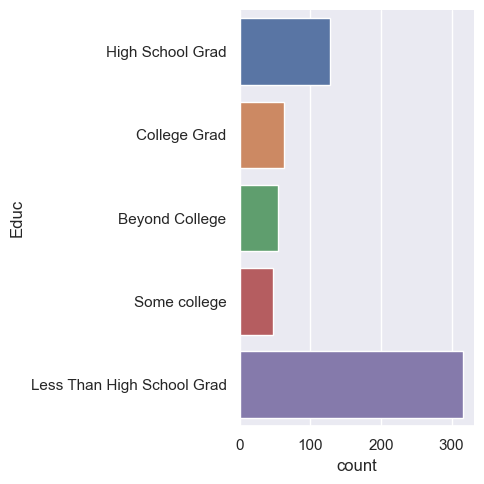

In [17]:
#Education 
sb.catplot(y = 'Educ', data = catData, kind = "count")

Almost half of our data set has an education level of less than high school grad.

### SES - Socioeconomic Status 

/Users/chloeyeo/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


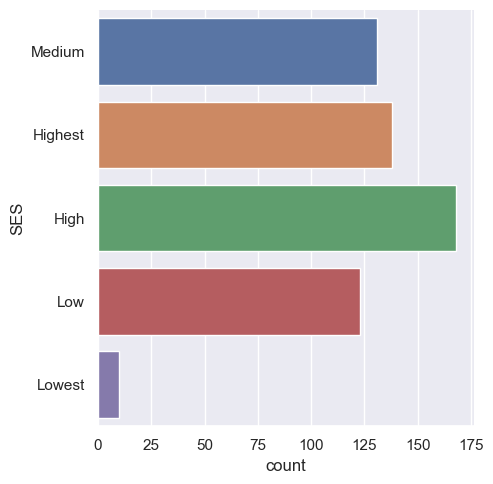

In [18]:
sb.catplot(y = 'SES', data = catData, kind = "count")

Our data set has a fair distribution of economic status, with rather equal number in the Low class to Highest class, but very few people are from the lowest class.

### Gender M/F

/Users/chloeyeo/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


F: 369.0 (60.69%)
M: 239.0 (39.31%)


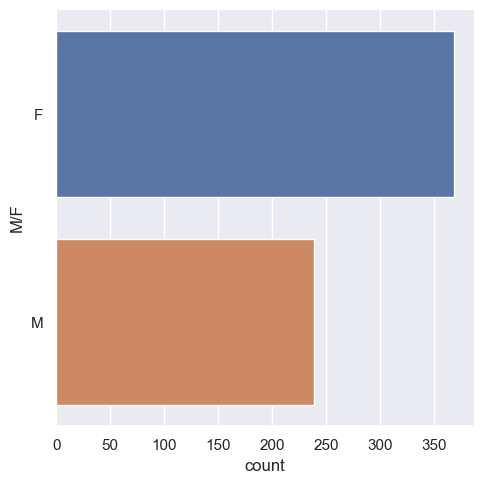

In [19]:
import seaborn as sns

# Calculate total count of each gender
total_count = catData['M/F'].value_counts()

# Calculate percentage for each gender
percentage = (total_count / total_count.sum()) * 100

# Combine counts and percentages into a DataFrame
summary_data = pd.DataFrame({'count': total_count, 'percentage': percentage})

# Plot the categorical data
sns.catplot(y='M/F', data=catData, kind='count')

# Print out the percentage for each gender
for gender, row in summary_data.iterrows():
    print(f"{gender}: {row['count']} ({row['percentage']:.2f}%)")


There are more females in the data set.

## Predictors Corresponding to Derived Anatomic Volumes

### eTIV - Estimated total intracranial volume (mm^3)

<Axes: xlabel='eTIV', ylabel='Count'>

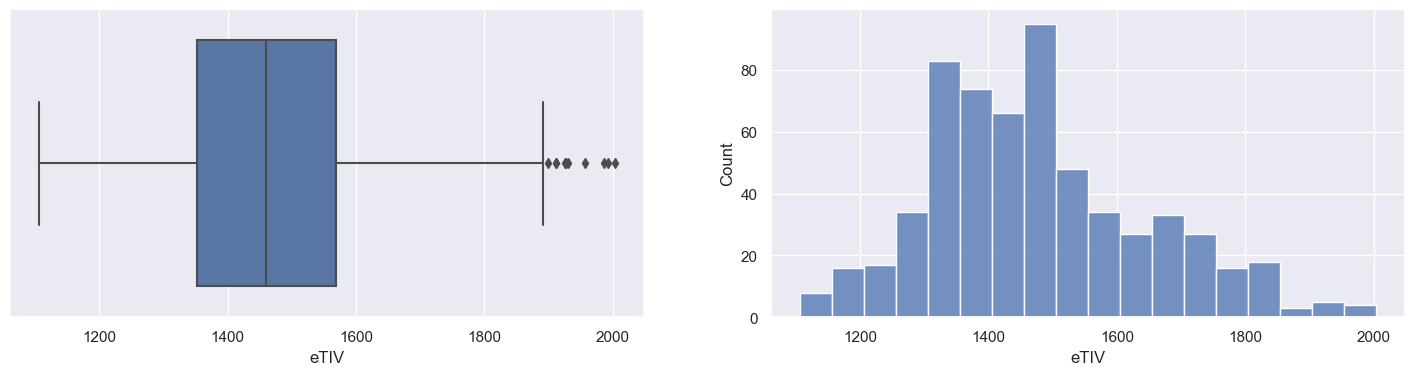

In [20]:
f, axes = plt.subplots(1, 2, figsize=(18, 4))
sb.boxplot(x = numericData['eTIV'], orient = "h", ax = axes[0])
sb.histplot(x = numericData['eTIV'], ax = axes[1])

In [21]:
numericData['eTIV'].describe().round(2)

count     608.00
mean     1477.06
std       170.65
min      1106.00
25%      1352.50
50%      1460.00
75%      1569.00
max      2004.00
Name: eTIV, dtype: float64

#### eTIV is a measure of the total volume within the cranial vault, which includes the brain, cerebrospinal fluid, and other structures. 
Reduced brain volume, including total brain volume and volume of specific brain regions, is a common finding in individuals with dementia

We will compare the eTIV of those with dementia and those without dementia. 

It is expected that eTIV of those with dementia should be lower. 
The minimum 1106mm^3 suggests the likelihood of dementia while the max 2004mm^3 suggests the likelihood of no dementia. 

### nBWV - Normalized Whole Brain Volume

<Axes: xlabel='nWBV', ylabel='Count'>

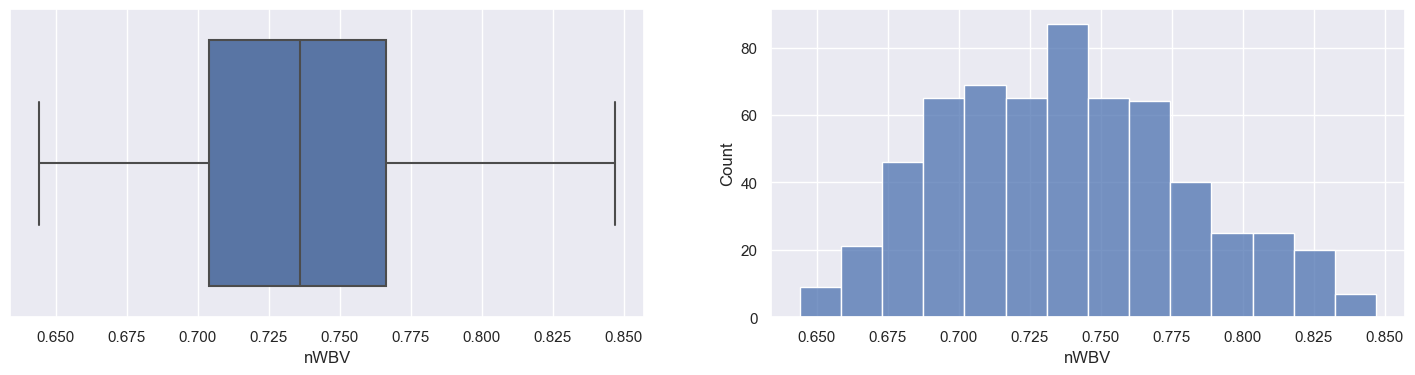

In [22]:
f, axes = plt.subplots(1, 2, figsize=(18, 4))
sb.boxplot(x = numericData['nWBV'], orient = "h", ax = axes[0])
sb.histplot(x = numericData['nWBV'], ax = axes[1])

In [23]:
numericData['nWBV'].describe().round(2)

count    608.00
mean       0.74
std        0.04
min        0.64
25%        0.70
50%        0.74
75%        0.77
max        0.85
Name: nWBV, dtype: float64

#### nWBV refers specifically to the volume of brain parenchyma (gray matter and white matter) divided by the eTIV or total brain volume.
It is a measure of the proportion of the intracranial space occupied by brain tissue, expressed as a percentage or fractional value.
nWBV provides information about the relative amount of brain tissue within an individual's cranial vault, accounting for differences in head size.

Hence, it should draw parallel to eTIV. The lower the value, the higher the chance of dementia.

The minimum 0.64 suggests the likelihood of dementia.

### ASF - Atlas Scaing Factor

<Axes: xlabel='ASF', ylabel='Count'>

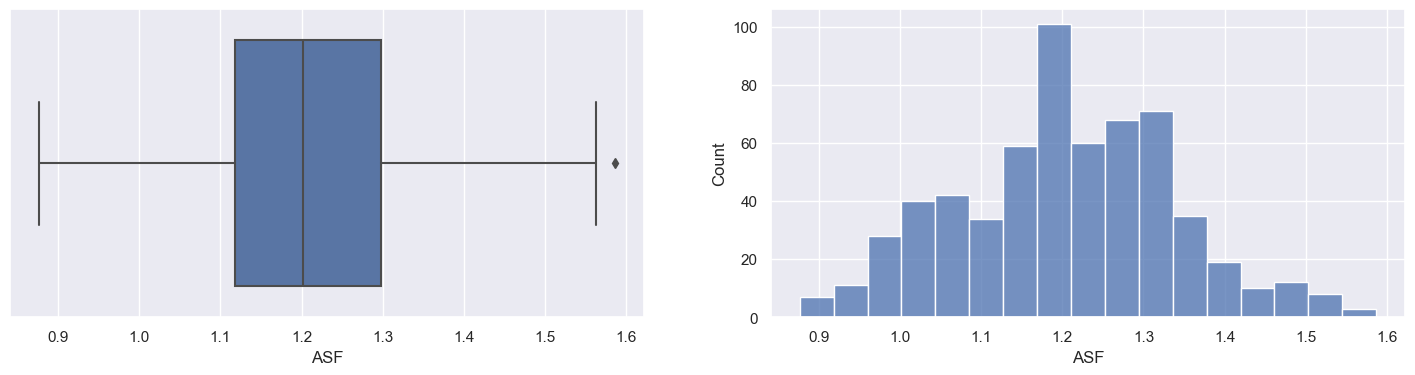

In [24]:
f, axes = plt.subplots(1, 2, figsize=(18, 4))
sb.boxplot(x = numericData['ASF'], orient = "h", ax = axes[0])
sb.histplot(x = numericData['ASF'], ax = axes[1])

In [25]:
numericData['ASF'].describe().round(2)

count    608.00
mean       1.20
std        0.14
min        0.88
25%        1.12
50%        1.20
75%        1.30
max        1.59
Name: ASF, dtype: float64

#### ASF standardizes brain images for analysis in neuroimaging research. It helps facilitate comparisons across different subjects and studies by ensuring that brain images are aligned to a common reference space. 

A higher value of ASF means that there was significant scaling and the size of the brain and/or skull in the native-space images was considerably different from the size of corresponding structures in the atlas space.

If the ASF values vary significantly across subjects, the normalization process may result in different levels of distortion or scaling applied to brain structures. This can affect the accuracy of comparisons between brain regions or structures across individuals or groups.

Thus, while ASF values serve as a quality assurance metric in neuroimaging studies, anomalies like abnormally high ASF should be removed. In this case, only one person has a very high ASF 1.59. Hence, there is no need to remove the data.

# Relationship with Response Variables (CDR)

After investigating the characteristics of the individual variables above, let's find out what causes high or low CDR. Is it due to demographics or does the CDR depend on the derived anatomic volumes? 

Check mutual relationships to find out potential effect of predictors on CDR.

### CDR vs Gender

<Axes: xlabel='M/F', ylabel='CDR'>

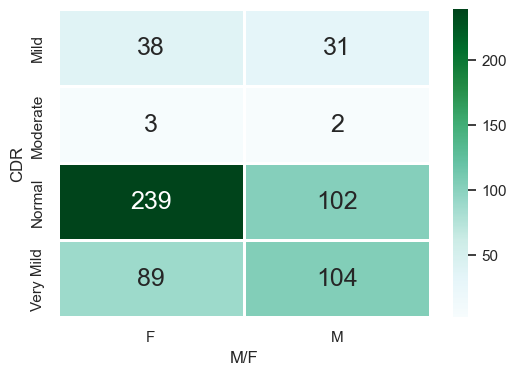

In [26]:
f = plt.figure(figsize=(6, 4))
sb.heatmap(alzheimersdata.groupby(['CDR', 'M/F']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

In [27]:
# Calculate total number of males and females in the sample
total_males = alzheimersdata[alzheimersdata['M/F'] == 'M'].shape[0]
total_females = alzheimersdata[alzheimersdata['M/F'] == 'F'].shape[0]

# Calculate total number of males and females for each CDR rating
males_by_cdr = alzheimersdata.groupby('CDR')['M/F'].apply(lambda x: (x == 'M').sum())
females_by_cdr = alzheimersdata.groupby('CDR')['M/F'].apply(lambda x: (x == 'F').sum())

# Calculate percentages of males and females for each CDR rating in relation to the total number of males and females, respectively
percentage_male_by_cdr = (males_by_cdr / total_males) * 100
percentage_female_by_cdr = (females_by_cdr / total_females) * 100

# Print percentages for each CDR rating
for cdr_rating in percentage_female_by_cdr.index:
    percentage_male = percentage_male_by_cdr[cdr_rating]
    percentage_female = percentage_female_by_cdr[cdr_rating]
    print("CDR {}: {:.2f}% males, {:.2f}% females".format(cdr_rating, percentage_male, percentage_female))


CDR Mild: 12.97% males, 10.30% females
CDR Moderate: 0.84% males, 0.81% females
CDR Normal: 42.68% males, 64.77% females
CDR Very Mild: 43.51% males, 24.12% females


To make a more meaningful comparison between genders, especially since our sample size is made up of more females(imbalanced gender distributions), it is more informative to compare percentages.

Around 65% of females had normal rating while around 42.68% of males had normal rating.

This suggests that it is more likely for males to have dementia.

Since dementia is a multifaceted condition with diverse causes, symptoms, and progression trajectories, gender is just one of many factors that contribute to the complexity of the disease. 
Individuals with dementia vary widely in their experiences and symptoms. 

Below, we further analyse other demographic factors in relationship to CDR, such as age, education and SES. 

### CDR vs Age

<Axes: xlabel='Age', ylabel='CDR'>

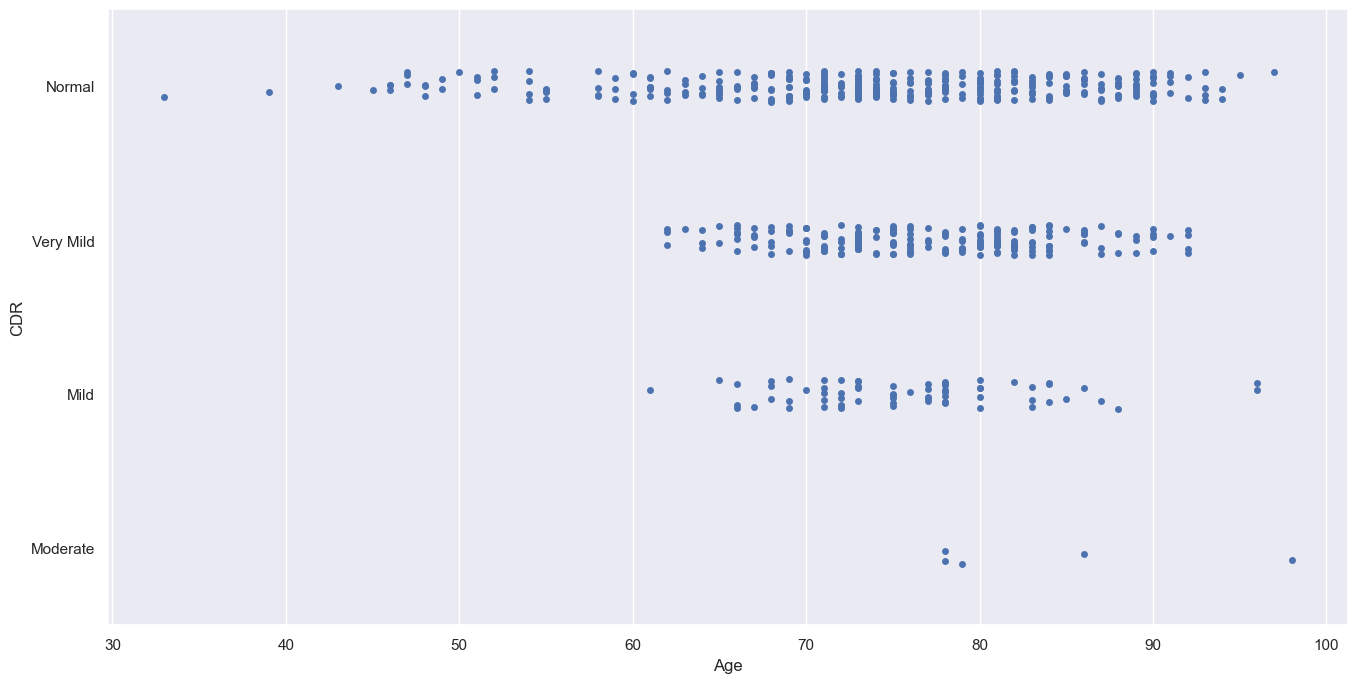

In [28]:
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'Age', y = 'CDR', data = alzheimersdata)

Normal CDR had the widest range in age. 
This suggests that cognitive function varies widely across different age groups. This finding is consistent with the natural aging process, where cognitive decline may occur gradually over time but does not necessarily indicate dementia.

People at the age of around 60-100 were assesed to have very mild CDR or mild CDR. But, there were more people with very mild than those with mild CDR. 

This suggests that cognitive changes may be more common and detectable at earlier stages (very mild) than at more advanced stages (mild). This could reflect the importance of early detection and intervention for cognitive impairment.

Significantly, only people in ages above 70 were assessed to have moderate CDR. None of the people below the age of 70 was assessted to have moderate CDR. 
This finding aligns with the general understanding that dementia risk increases with age and that more severe cognitive impairment is more common in older adults.

### CDR vs Educ

<Axes: xlabel='Educ', ylabel='CDR'>

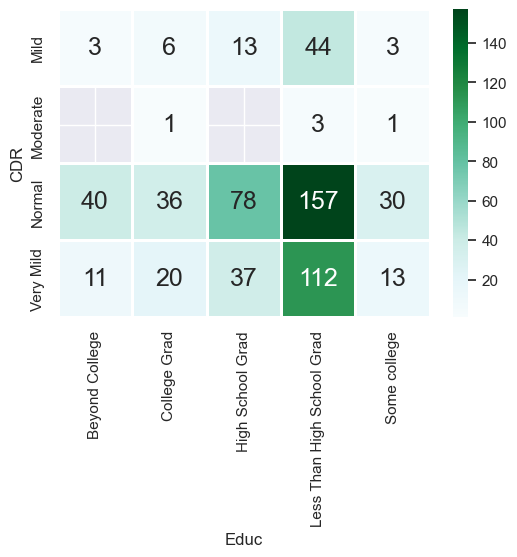

In [29]:
f = plt.figure(figsize=(6, 4))
sb.heatmap(alzheimersdata.groupby(['CDR', 'Educ']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

Amongst people who were assessed "Very Mild", "Mild", "Moderate", most of them had an education level that is less than high school grad. 
However those who scored "Normal" CDR also mostly had an education level that is less than high school grad.
This is due to our sample size being heaily made up of this education level. 
#### But, there is significantly more "less than high school grad" who scored "Very Mild" CDR, about triple of those who graduated from high school. Thus, education could be a strong factor in detecting dementia.

### CDR vs SES

<Axes: xlabel='SES', ylabel='CDR'>

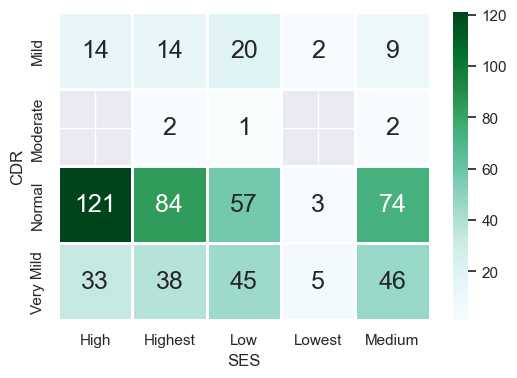

In [30]:
f = plt.figure(figsize=(6, 4))
sb.heatmap(alzheimersdata.groupby(['CDR', 'SES']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

At first glance, the number of people in each rating seemed to be similar. Thus I have decided to use proportion for more accurate interpretation.

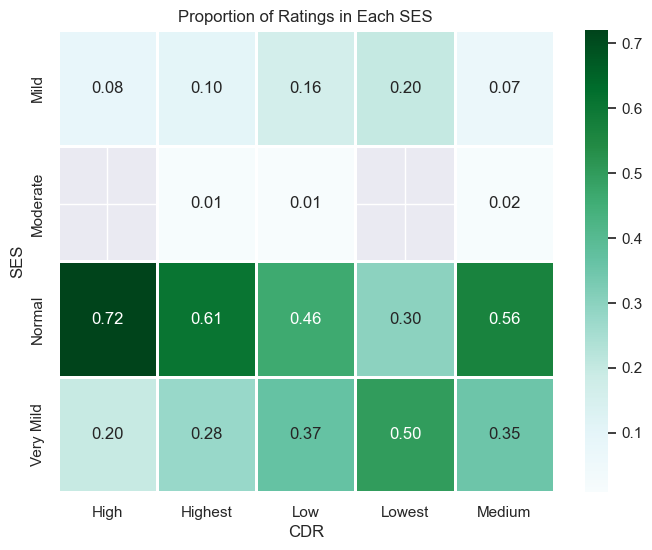

In [31]:
import seaborn as sns

# Calculate total count of each SES category
total_count_by_ses = alzheimersdata['SES'].value_counts()

# Group by CDR and SES, and calculate count within each group
counts_by_cdr_ses = alzheimersdata.groupby(['CDR', 'SES']).size().unstack()

# Normalize counts by SES to obtain proportions
proportions_by_ses = counts_by_cdr_ses.div(total_count_by_ses, axis=1)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(proportions_by_ses, 
            linewidths=1, 
            annot=True, 
            fmt='.2f', 
            annot_kws={"size": 12}, 
            cmap="BuGn")

# Set plot labels and title
plt.xlabel('CDR')
plt.ylabel('SES')
plt.title('Proportion of Ratings in Each SES')

# Show plot
plt.show()


The proportion of ratings in each SES seemed to differ largely. 
Particularly in the high SES and highest SES, there is a larger proportion of people who have Normal CDR. 
#### Given that our data set had a fair distribution of SES, it is possible that high SES contributed to Normal CDR. This suggests that a wealthier life plays a role in delaying or preventing dementia. 

### CDR vs eTIV

<Axes: xlabel='eTIV', ylabel='CDR'>

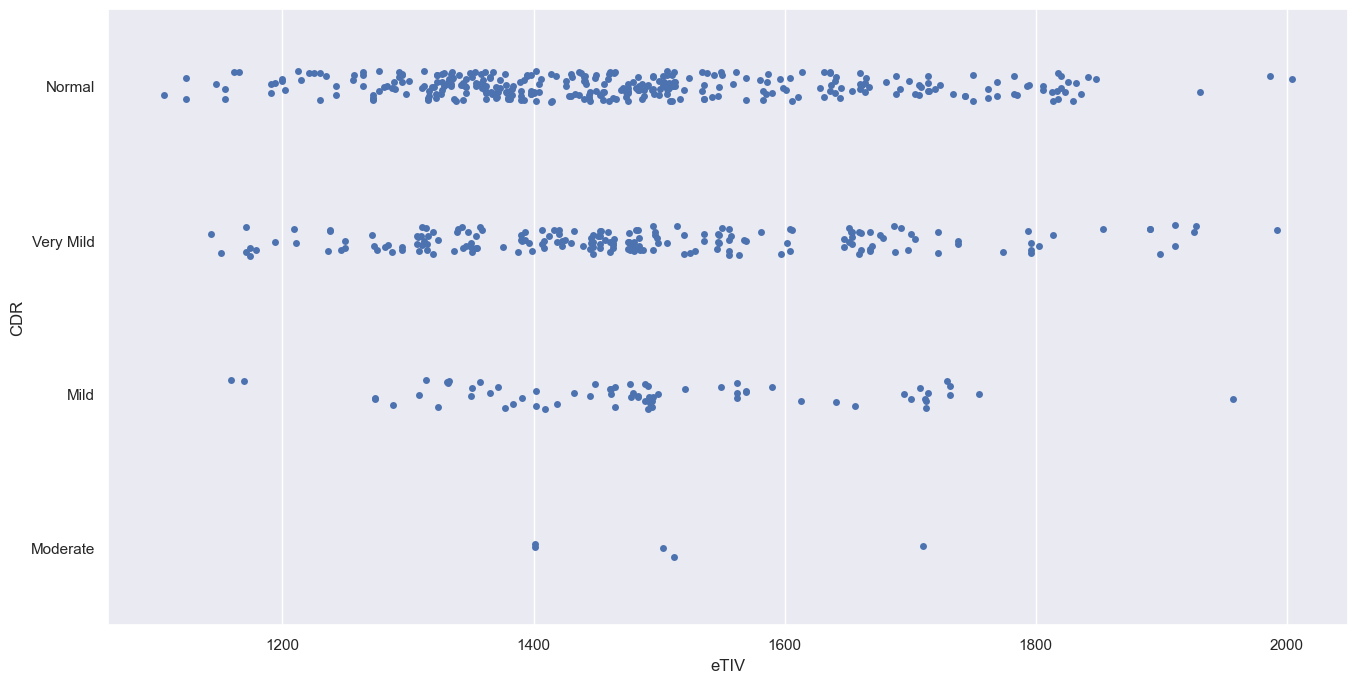

In [32]:
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'eTIV', y = 'CDR', data = alzheimersdata)

eTIV of those with normal CDR ranges from 1200 to 2000. Since very mild, mild and moderate ratings were in this range too, not much analysis can be done about eTIV in relation to dementia. 

### CDR vs nWBV

<Axes: xlabel='nWBV', ylabel='CDR'>

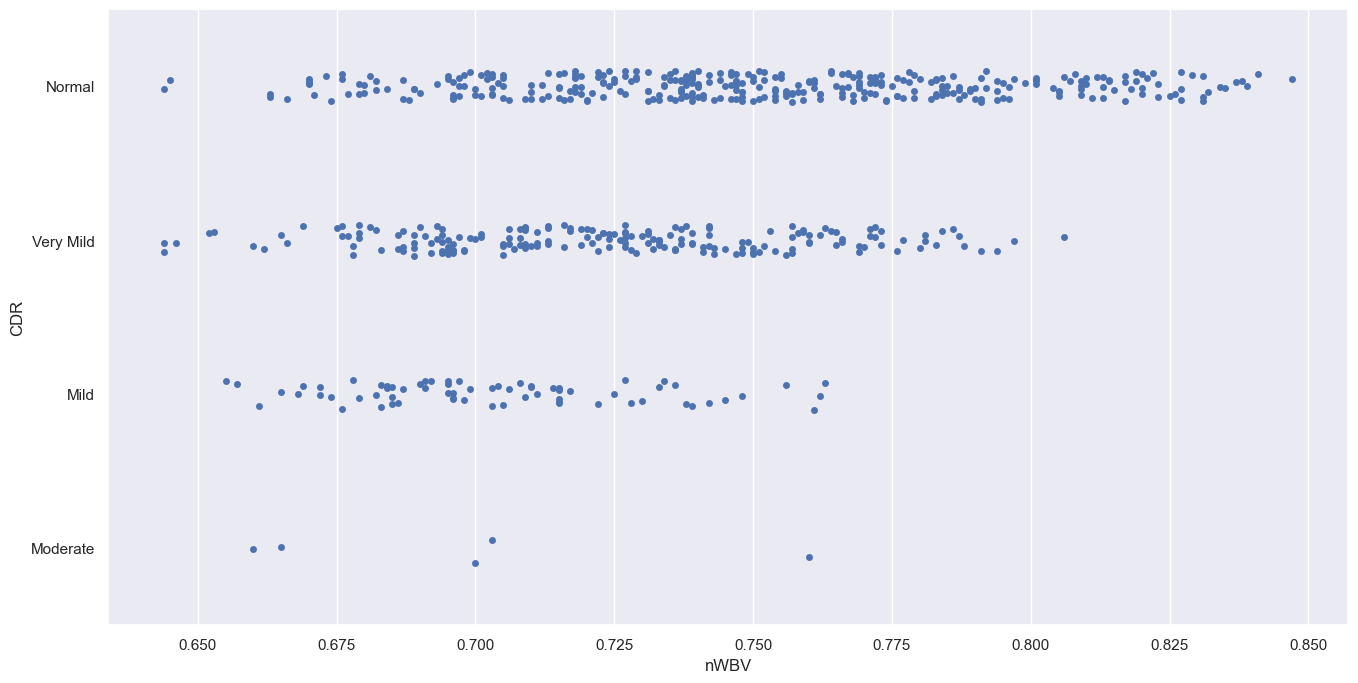

In [33]:
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'nWBV', y = 'CDR', data = alzheimersdata)

Even though nWBV of those with Normal CDR ranges from 0.650 and 0.850, it is clear that more people with Mild and Moderate CDRs have nBWVs of smaller values like 0.650 to 0.700.
#### Thus, smaller nBWVs may be indicators of dementia.

### CDR vs ASF

<Axes: xlabel='ASF', ylabel='CDR'>

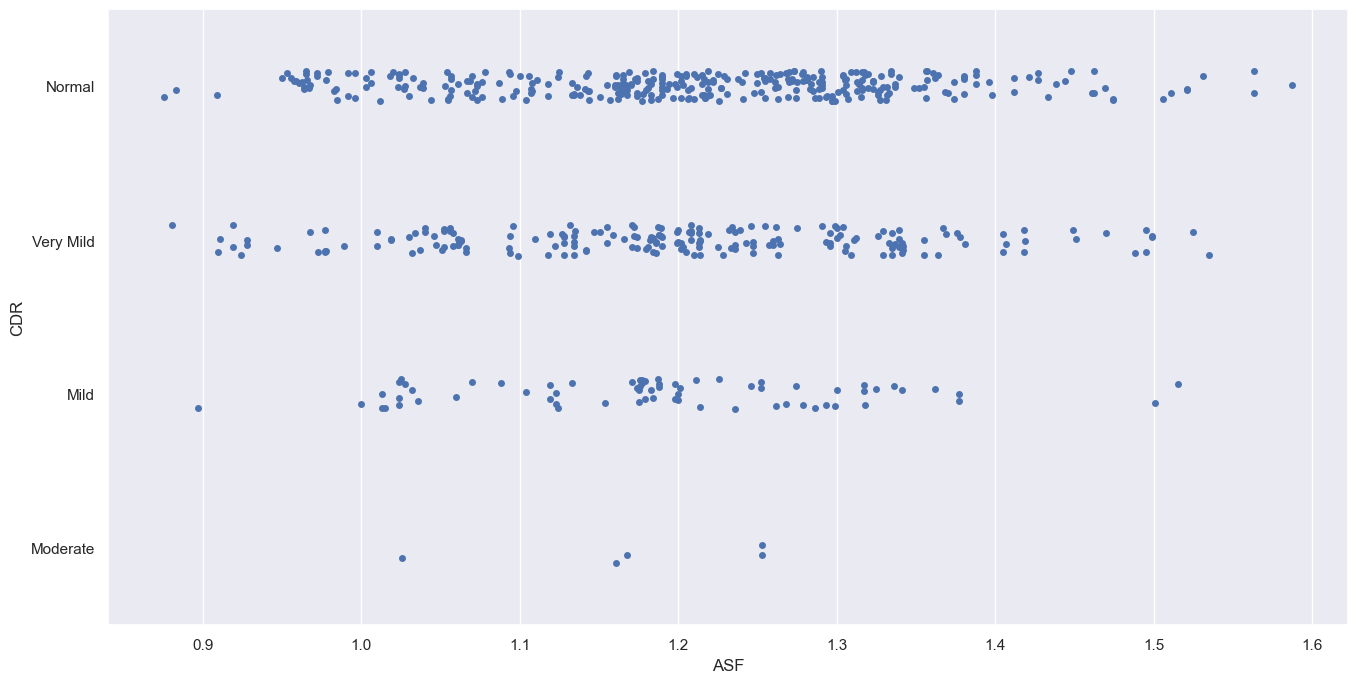

In [34]:
# CDR vs ASF
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'ASF', y = 'CDR', data = alzheimersdata)

ASFs of those with Normal CDRS had a huge range from 0.9 to 1.6. This means that ASF did not alter the interpretation of results which was a potential consequence of abnormally high ASF.

Notably, those with Moderate CDR had ASFs ranging from 1.0 to 1.3. However, not much can be concluded as those with Very Mild and Mild CDR still covers a large range of ASF. 